In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

data = load_iris(as_frame=True)

## Subtask 1

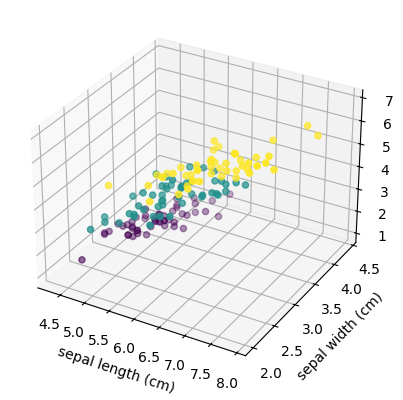

In [2]:
# Plot first three columns in 3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = data.frame['sepal length (cm)']
y = data.frame['sepal width (cm)']   
z = data.frame['petal length (cm)']

ax.scatter(x,y,z,c=data.frame['target'])
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')

plt.show()


In [3]:
class myPCA:
    def __init__(self, n_components: int = 2, method: str = 'svd') -> None:
        """
        The constructor of the PCA algorithm.
        
        :param n_components: int, default = 2
            The dimension to which the data will be reduced.
        :param method: str, default = 'svd'
            The method used by PCA to reduce the dimensionality of the data.
        """
        self.__n_components = n_components
        if method in ['svd', 'eigen']:
            self.__method = method
        else:
            raise ValueError(f"'{method}' is not a method implemented in this model")
    
    def fit(self, X: np.ndarray):
        """
        The fitting method.
        
        :param X: np.ndarray
            The data on which we want to fit the PCA
        """
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[:self.__n_components, :]
            
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T)
            
            # Getting the eigenvectors and eigenvalues
            self.eig_vals, self.eig_vecs = np.linalg.eig(corr_mat)
            
            # Sorting the list of tuples (eigenvalue, eigenvector)
            self.eig_pairs = [
                (np.abs(self.eig_vals[i]), self.eig_vecs[:, i]) 
                for i in range(len(self.eig_vals))
            ]
            self.eig_pairs.sort(key=lambda x: x[0], reverse=True)
            
            # Calculating the explained variance ratio
            total = sum(self.eig_vals)
            self.explained_variance_ratio = [
                (i / total) * 100 
                for i in sorted(self.eig_vals, reverse=True)
            ]
            self.cumulative_variance_ratio = np.cumsum(
                self.explained_variance_ratio
            )
            
            # Creating the projection matrix
            self.matrix_w = np.hstack(
                tuple(
                    self.eig_pairs[i][1].reshape(np.size(X, 1), 1) 
                    for i in range(self.__n_components)
                )
            )
        
        return self
    
    def transform(self, X: np.ndarray) -> np.ndarray:
        """
        The transform function.
        
        :param X: np.ndarray
            The data that we must reduce.
        """
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot(self.matrix_w)

In [ ]:
# Create PCA instances 
pca_eigen = myPCA(method='eigen')
pca_svd = myPCA()
pca_sklearn = PCA(n_components=2)

X = data.data

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train and reduce dimensionality to 2
pca_eigen.fit(X_scaled)
X_pca_eigen = pca_eigen.transform(X_scaled)
pca_svd.fit(X_scaled)
X_pca_svd = pca_svd.transform(X_scaled)
pca_sklearn.fit(X_scaled)
X_pca_sklearn = pca_sklearn.transform(X_scaled)



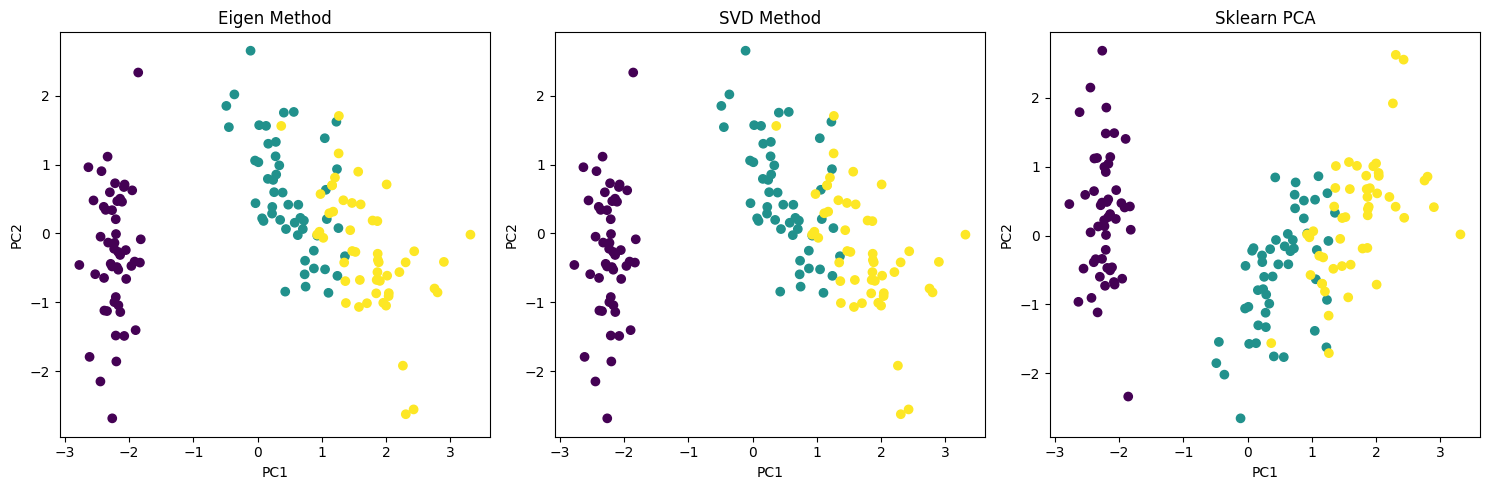

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Eigen method
axes[0].scatter(X_pca_eigen[:, 0], X_pca_eigen[:, 1], c=data.target)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].set_title('Eigen Method')

# SVD method
axes[1].scatter(X_pca_svd[:, 0], X_pca_svd[:, 1], c=data.target)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('SVD Method')

# Sklearn
axes[2].scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], c=data.target)
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].set_title('Sklearn PCA')

plt.tight_layout()
plt.show()

#### Conclusions

All 3 PCA implementations produce the same result thus confirming they're mathematically identical. Although the scikit learn implementation is upside down for some reason.
The 3 different target clusters are distinctively separated in the 2d plot displaying clear layering and most variance on the PC1 axis with also significant variance on the PC2 axis.


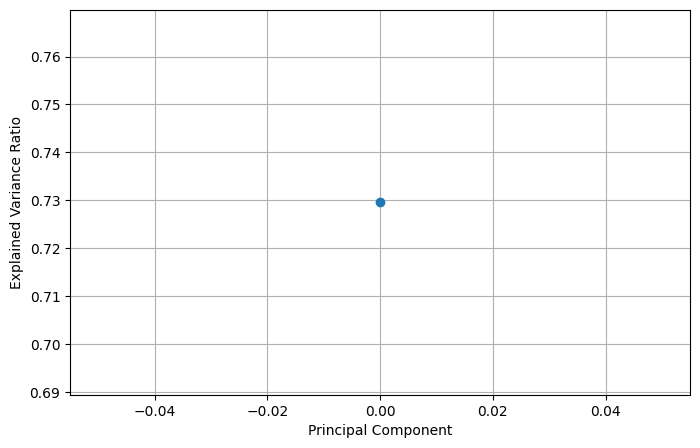

In [14]:
# Retrain sklearn PCA with 1 component and plot explained variance ratio
pca_sklearn = PCA(n_components=1)
pca_sklearn.fit(X_scaled)
X_pca_sklearn_1d = pca_sklearn.transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(pca_sklearn.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


#### Conclusions

The explained variance ratio plot shows a single point of 0.73 indicating the amount of variance explained by the PC1 component when reducing to 1 dimension.

## Subtask 2

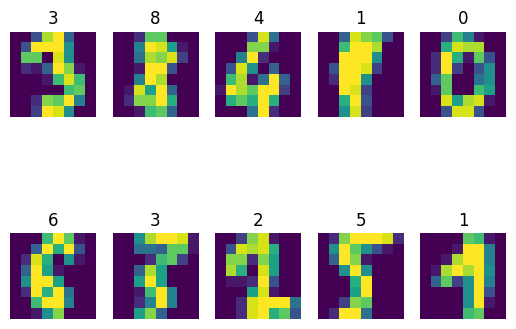

In [26]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits = digits.data

# Plot 10 random digits
fig,axes=plt.subplots(2,5)
sample = np.random.randint(0,len(X_digits),10)

for i,ax in zip(sample,axes.flatten()):
    ax.imshow(X_digits[i].reshape(8,8))
    ax.set_title(digits.target[i])
    ax.axis('off')

plt.show()

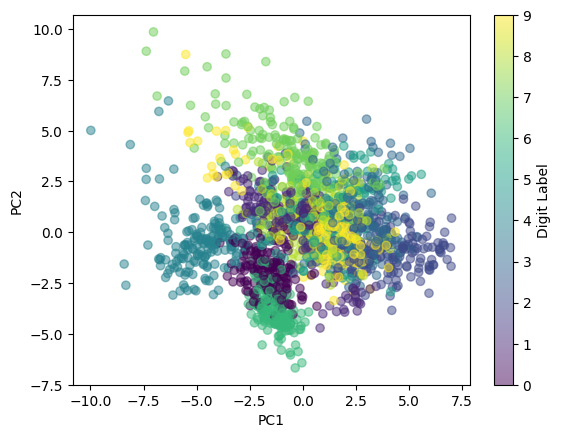

In [25]:
# Reduce dimensionality to 2 using sklearn PCA
pca_sklearn = PCA(n_components=2)
scaler = StandardScaler()
X_digits_scaled = scaler.fit_transform(X_digits)
pca_sklearn.fit(X_digits_scaled)
X_pca_digits = pca_sklearn.transform(X_digits_scaled)

#Plot the new result data set in a scatter plot with each point having colored by its digit label
plt.figure()
plt.scatter(X_pca_digits[:, 0], X_pca_digits[:, 1], c=digits.target, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Digit Label')
plt.show()